In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_log_error, median_absolute_error

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [155]:
#reading the data 
df=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


##### Understanding the data and its distribution

In [156]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


##### Data cleaning & Feature Engineering

*Since the data does not have any unique id or we will not remove duplicates*

In [158]:
#checkking whether there is any na values in the data
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [159]:
#finding rows where education level is na 
df[df['Education Level'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [160]:
#drop rows where all values are na
df=df.dropna(how='all',axis=0)
#checking the na values in data after dropping 
df.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [161]:
#labels in eductaion distribution in the data
edu=df.value_counts(df['Education Level'])
print(edu)

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
dtype: int64


In [162]:
#found multiple category labels, combined and mapped them
map_var={"High School":1,"Bachelor's Degree":2,"Bachelor's":2,"Master's Degree":3,"Master's":3,"PhD":4,"phD":4}
df['Education'] = df['Education Level'].transform(lambda x: x.map(map_var))
df['Education'].unique()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,2.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,3.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,4.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,2.0
4,52.0,Male,Master's,Director,20.0,200000.0,3.0


In [163]:
df[df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,3.0
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,2.0
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,2.0


In [164]:
#fill the missing salary considering the job title and eductaion
df['Salary']=df.groupby(['Job Title','Education'])['Education'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df[df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
2011,27.0,Male,NaN,Developer,7.0,NaN,NaN


In [165]:
#dropping the rows where still na values are present 
df.dropna(axis=0,inplace=True)
df.isna().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Education              0
dtype: int64

Gender
Male      3673
Female    3013
Other       14
dtype: int64


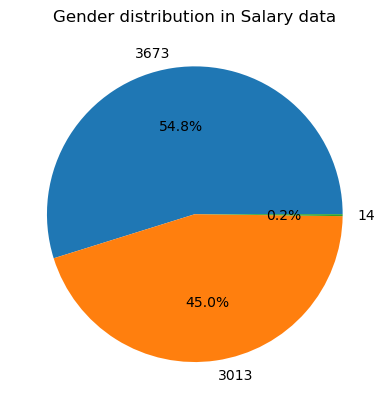

In [166]:
#plotting the gender distribution in the data
gender=df.value_counts(df['Gender'])
print(gender)
plt.pie(gender,labels=gender,autopct='%1.1f%%')
plt.title('Gender distribution in Salary data')
plt.show()

*The data has almost an equal distribution of male and female, however the 'other' categories are found to be significantly less*

In [167]:
#The gender labels are changed to numercal values using LabelEncoder method
df['Gender']=LabelEncoder().fit_transform(df['Gender']) #male as 1, female 0 and others and 2
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education
0,32.0,1,Bachelor's,Software Engineer,5.0,2.0,2.0
1,28.0,0,Master's,Data Analyst,3.0,3.0,3.0
2,45.0,1,PhD,Senior Manager,15.0,4.0,4.0
3,36.0,0,Bachelor's,Sales Associate,7.0,2.0,2.0
4,52.0,1,Master's,Director,20.0,3.0,3.0


In [168]:
print("No of unique jobs titles are: ",df['Job Title'].nunique())
#The lables under job title are changed to numercal values using LabelEncoder method
df['Job Title']=LabelEncoder().fit_transform(df['Job Title']) 
df.info()

No of unique jobs titles are:  191
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6700 non-null   float64
 1   Gender               6700 non-null   int32  
 2   Education Level      6700 non-null   object 
 3   Job Title            6700 non-null   int32  
 4   Years of Experience  6700 non-null   float64
 5   Salary               6700 non-null   float64
 6   Education            6700 non-null   float64
dtypes: float64(4), int32(2), object(1)
memory usage: 366.4+ KB


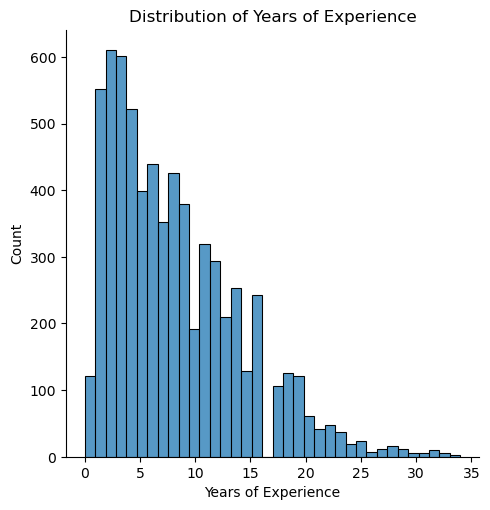

In [169]:
sns.displot(data=df, x='Years of Experience')
plt.title('Distribution of Years of Experience')
plt.show()

*Skewed to the right which implies the need of normalization before applying ML algorithms as well as the presense of outliers in the data*

<Axes: >

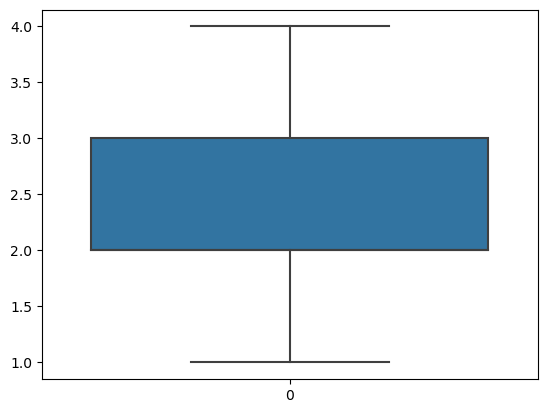

In [170]:
sns.boxplot(df['Salary'])

*No outliers found in salary variable. In case of age and years of experience, some outliers are found above the third quartile. But I believe removing those values might affect the prediction model.*

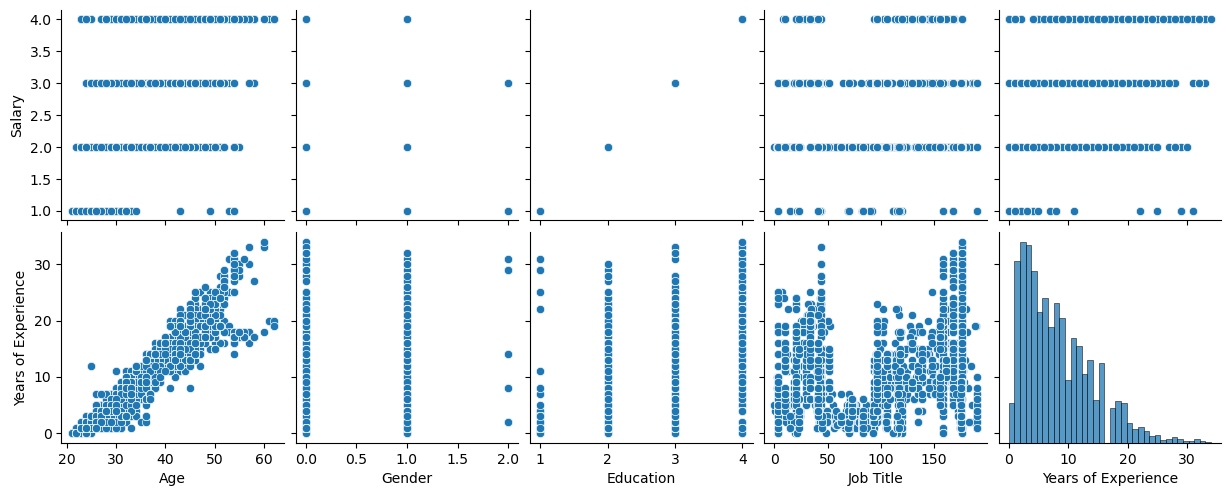

In [171]:

#from sklearn.preprocessing import MinMaxScaler
#Normalize the data (age,years of experience)
#df[['Age','Years of Experience']]=MinMaxScaler().fit_transform(df[['Age','Years of Experience']])

sns.pairplot(df, x_vars=['Age','Gender','Education','Job Title','Years of Experience'], y_vars=["Salary",'Years of Experience'])

*Strong correlation has been observed between education & salary, age & years of experience*

<Axes: >

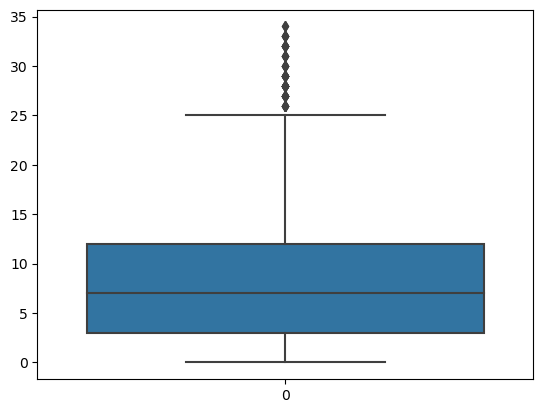

In [232]:
#checking outliers in the data
sns.boxplot(df['Years of Experience'])

##### Applying regression model


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6700 non-null   float64
 1   Gender               6700 non-null   int32  
 2   Education Level      6700 non-null   object 
 3   Job Title            6700 non-null   int32  
 4   Years of Experience  6700 non-null   float64
 5   Salary               6700 non-null   float64
 6   Education            6700 non-null   float64
dtypes: float64(4), int32(2), object(1)
memory usage: 624.4+ KB


*NOTE: The given data is giving a well balanced model without even applying any kind of regularization or any control variables.*

*I tried to manipulate variables and splitting ratio in order to observe overfitting an dunderfitting cases.*

**Case 1: Well Balanced Model**

In [234]:
#Assigning the dependent and independent variables 
X=df[['Age','Gender','Education','Job Title','Years of Experience']]
Y=df['Salary']

In [235]:

# Split the data into training and testing sets (0.7:0.3)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=33)

#Train the Linear Regression model
model=LinearRegression().fit(X_train, Y_train)
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

# Calculate mean squared error (MSE) for training and testing data
train_error=mean_squared_error(Y_train,Y_pred_train)
test_error=mean_squared_error(Y_test,Y_pred_test)

print("Training Error:", train_error)
print("Testing Error:", test_error)

Training Error: 9.88641190972879e-31
Testing Error: 9.8924040567967e-31


*Training error is approximately equal to testing error, which implies equal performance in training and testing*

*Therefore, we can consider this as a well balanced model.*


##### **Case 2: Underfitting**

*NOTE: We cannot consider this as a good example of underfitting*

In [236]:

# Split the data into training and testing sets (0.9:0.1)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.9,test_size=0.1,random_state=111)

#Train the Linear Regression model
model=LinearRegression().fit(X_train, Y_train)
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

# Calculate mean squared error (MSE) for training and testing data
train_error=mean_squared_error(Y_train,Y_pred_train)
test_error=mean_squared_error(Y_test,Y_pred_test)

print("Training Error:", train_error)
print("Testing Error:", test_error)

Training Error: 2.3000928939884217e-29
Testing Error: 2.160514880505349e-29


*model is not able to make accurate predictions based on training data and hence, doesn’t have the capacity to generalize well on new data*

**Case 3: Overfitting**

*Overfitting occurs wheen we increase the complexity of the model, remove outliers which are necessary, and take a large proportion of data for training while leaving only a small proportion for testing*

In [237]:
#data copied to new name 
df1=df

<Axes: >

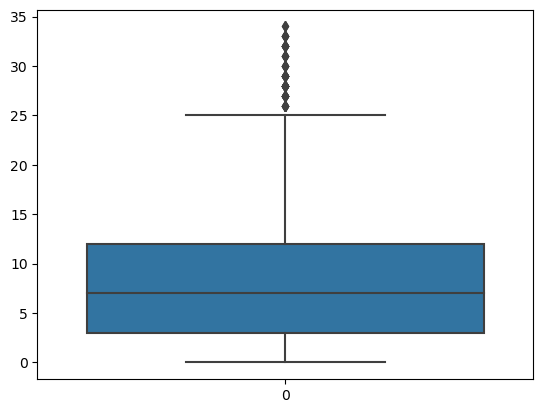

In [238]:
#checking outliers in 'years of experience' and removing it
sns.boxplot(df1['Years of Experience'])


<function matplotlib.pyplot.show(close=None, block=None)>

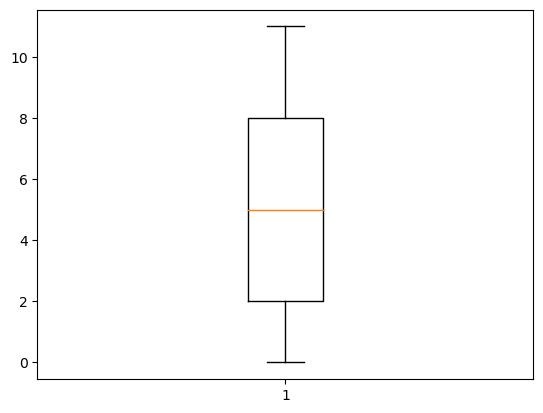

In [239]:
#Calculate the  upper thresholds
outliers=np.percentile(df1['Years of Experience'],75)  # Remove the highest 20% outliers

# Remove the lowest and highest outliers by filtering the DataFrame
df1=df1[df1['Years of Experience']<outliers]

#plot the boxplot again to find whther it removed outliers
plt.boxplot(df1['Years of Experience'])
plt.show

In [240]:
#Assigning the dependent and independent variables 
X=df1[['Age','Gender','Education','Job Title','Years of Experience']]
Y=df1['Salary']

In [241]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso,LassoCV
from sklearn.model_selection import cross_val_score

#Optimizing the best alpha value 

# Define the range of alpha values to consider
alphas=np.logspace(-1,5,15 )  # Example range from 0.001 to 1000

# Instantiate the RidgeCV model with the range of alphas and perform cross-validation
ridge_cv=RidgeCV(alphas=alphas,cv=10)
ridge_cv.fit(X_train, Y_train)

#Get the optimal alpha value
best_alpha=ridge_cv.alpha_
print("Best alpha:", best_alpha)

Best alpha: 0.1


In [242]:
#Split the data into training and testing sets (0.9:0.1).
#Majority of datapoints are considered in the train data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.20,random_state=33)


#applying the ridge regression model better feature selection
#Regularization using best alpha (parameter) value we found 
model=Ridge(alpha=0.1).fit(X_train, Y_train)
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

#Calculate mean squared error (MSE) for training and testing data
train_error=mean_squared_error(Y_train,Y_pred_train)
test_error=mean_squared_error(Y_test,Y_pred_test)

print("Training Error:", train_error)
print("Testing Error:", test_error)

Training Error: 1.756229677271303e-09
Testing Error: 1.7837816336946819e-09


In [243]:
#applying lasso as a regularization method

# Define the range of alpha values to consider
alphas = np.logspace(-1,10,10)  # Example range from 0.001 to 1000

# Instantiate the LassoCV model with the range of alphas and perform cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, Y_train)

# Get the optimal alpha value
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

# Train the Lasso regression model with the optimal alpha
model=Lasso(alpha=best_alpha).fit(X_train, Y_train)
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

#Calculate mean squared error (MSE) for training and testing data
train_error=mean_squared_error(Y_train,Y_pred_train)
test_error=mean_squared_error(Y_test,Y_pred_test)

print("Training Error:", train_error)
print("Testing Error:", test_error)


Best alpha: 0.1
Training Error: 0.02042103874580379
Testing Error: 0.020816770438542968


*Training error is less than testing error. The model performs really well in train data but not really good in the test data. This is called **overfitting**.*

*NOTE: I couldnot find any big difference*

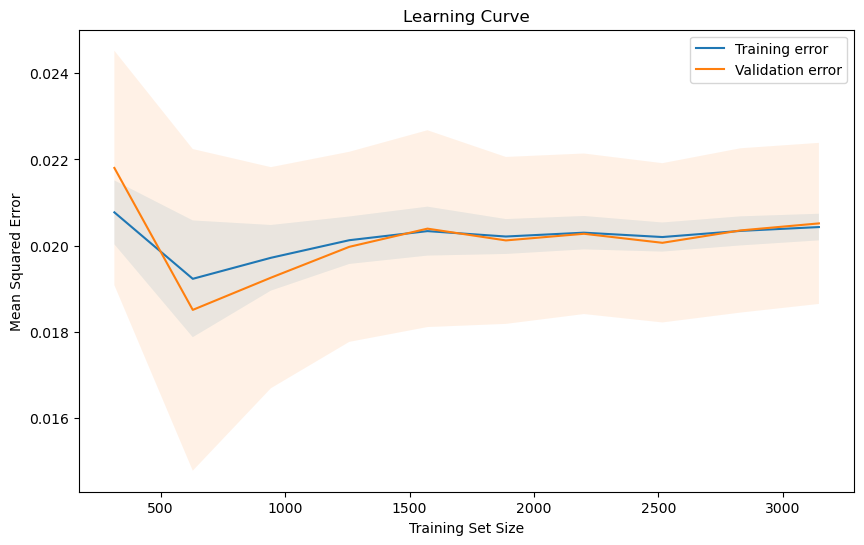

In [244]:
train_sizes,train_scores,test_scores=learning_curve(model, X_train, Y_train,scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and standard deviation for training and testing scores
train_scores_mean=-np.mean(train_scores, axis=1)
train_scores_std=np.std(train_scores, axis=1)
test_scores_mean=-np.mean(test_scores, axis=1)
test_scores_std=np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Classification

In [282]:
#For the ease of understanding I am using only the train data from car insureance related data and splitting that for building model
#reading the data
df_train=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\\train.csv")

In [283]:
#understanding the data types and variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

<Axes: >

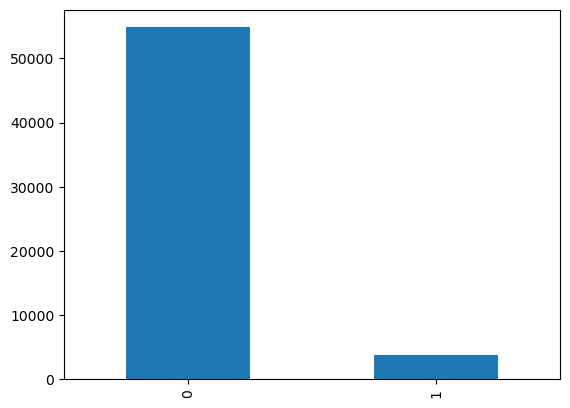

In [284]:
#checking the distribution of target value
df_train["is_claim"].value_counts().plot.bar()

*The distrution is found to be unequal/imbalanced*

df_train.shape

*In the previous analysis we found that there is no null values or duplicated values in the data*

(array([15521., 18204.,  4116.,  8294.,  8810.,     0.,     0.,     0.,
          492.,  3155.]),
 array([  290.,  7604., 14918., 22232., 29546., 36860., 44174., 51488.,
        58802., 66116., 73430.]),
 <BarContainer object of 10 artists>)

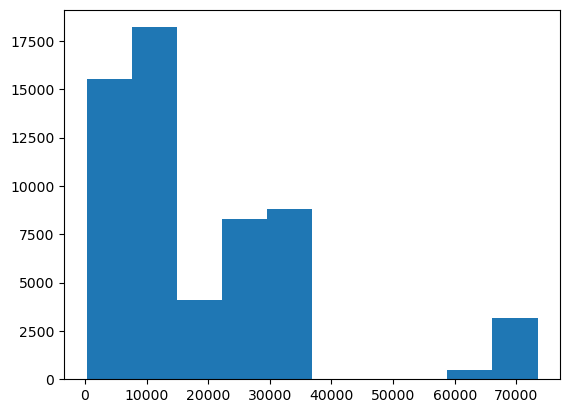

In [285]:
plt.hist(df_train['population_density'])

(array([15521., 18204.,  4116.,  8294.,  8810.,     0.,     0.,     0.,
          492.,  3155.]),
 array([-1.04965081, -0.63549509, -0.22133937,  0.19281635,  0.60697207,
         1.02112779,  1.43528351,  1.84943923,  2.26359495,  2.67775067,
         3.09190639]),
 <BarContainer object of 10 artists>)

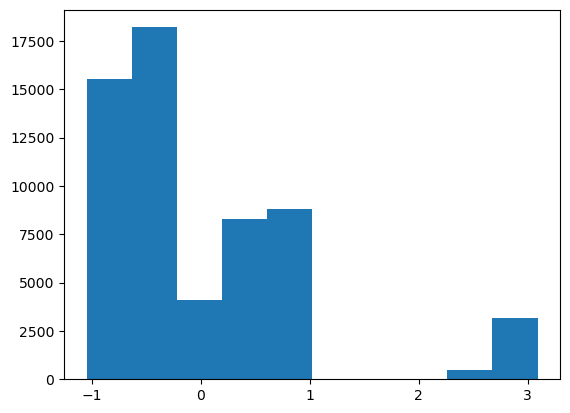

In [286]:
#Scaling the variable population density
df_train['population_density']= df_train['population_density'].to_numpy().reshape(-1, 1)
df_train['population_density']=StandardScaler().fit_transform(df_train[['population_density']])

plt.hist(df_train['population_density'])

##### Applying classification model

In [287]:
#setting the independent variables and dependent variables
X=df_train.drop(["is_claim","policy_id"],axis=1)
X=X.apply(LabelEncoder().fit_transform)

Y=df_train['is_claim']

*Since we are considering imbalanced data we can consider the precision score for evaluation*

**Case 1: Well balanced model* 

*NOTE: I am not getting any perfect example for all the three instances to evaluate*

In [296]:
#split ration 70:30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=33)

#information gain condition for feature selection 
#Decision tree based prediction where the criterion is set to 'entropy'

dt=DecisionTreeClassifier(max_depth=6, random_state=42, criterion='entropy').fit(X_train,Y_train)
# Fit the decision tree model on the training fold

# Make predictions on the testing data
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test)


print("Testing Classification Report:")
print(classification_report(Y_train,Y_pred_train))
print(classification_report(Y_test,Y_pred_test))


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43856
           1       0.89      0.00      0.01      3017

    accuracy                           0.94     46873
   macro avg       0.91      0.50      0.49     46873
weighted avg       0.93      0.94      0.90     46873

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10988
           1       0.00      0.00      0.00       731

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



*Here we can observe, though the accuracy remains the dame, the precison value target variable labels are better in the training prediction*

*Now, to clear the imbalnce in target variable SMOTE is applied*
*For futher analysis perform regularization methods like cross validation*

In [298]:
# Split the data into training and testing sets (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=33)

# Apply SMOTE to the training data
smote = SMOTE(random_state=33)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)


In [299]:
# Applying Model and evaluating 
# Decision Tree Classifier with entropy criterion and max depth
dt=DecisionTreeClassifier(max_depth=6, random_state=42, criterion='entropy')

# Perform cross-validation
cv_scores = cross_val_score(dt, X_train_smote, Y_train_smote, cv=5)

# Fit the decision tree model on the training data
dt.fit(X_train_smote, Y_train_smote)

# Make predictions on the testing data
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("")

print("Training Classification Report:")
print(classification_report(Y_train, Y_pred_train))
print("")

print("Testing Classification Report:")
print(classification_report(Y_test, Y_pred_test))


Cross-Validation Scores:
[0.74593855 0.86040016 0.85577471 0.85514765 0.85383651]
Mean CV Score: 0.83421951500729

Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     43856
           1       0.13      0.14      0.14      3017

    accuracy                           0.89     46873
   macro avg       0.54      0.54      0.54     46873
weighted avg       0.89      0.89      0.89     46873


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10988
           1       0.12      0.14      0.13       731

    accuracy                           0.88     11719
   macro avg       0.53      0.54      0.54     11719
weighted avg       0.89      0.88      0.89     11719



**Case 2: Overfitting**

In [301]:
#applying random forest model 

# Random Forest model
dt=RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(dt, X_train_smote, Y_train_smote, cv=5)

# Fit the decision tree model on the training data
dt.fit(X_train_smote, Y_train_smote)

# Make predictions on the testing data
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("")

print("Training Classification Report:")
print(classification_report(Y_train, Y_pred_train))
print("")

print("Testing Classification Report:")
print(classification_report(Y_test, Y_pred_test))


Cross-Validation Scores:
[0.83218378 0.97491877 0.97531638 0.97246608 0.97212405]
Mean CV Score: 0.9454018116229846

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43856
           1       1.00      1.00      1.00      3017

    accuracy                           1.00     46873
   macro avg       1.00      1.00      1.00     46873
weighted avg       1.00      1.00      1.00     46873


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10988
           1       0.09      0.04      0.05       731

    accuracy                           0.92     11719
   macro avg       0.51      0.51      0.50     11719
weighted avg       0.89      0.92      0.90     11719



*Again we found training data is performing better than testing data. A case of overfitting*

**Case 3: Underfitting**

In [302]:
#applying logistic regression model 

# Random Forest model
dt=LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(dt, X_train_smote, Y_train_smote, cv=5)

# Fit the decision tree model on the training data
dt.fit(X_train_smote, Y_train_smote)

# Make predictions on the testing data
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("")

print("Training Classification Report:")
print(classification_report(Y_train, Y_pred_train))
print("")

print("Testing Classification Report:")
print(classification_report(Y_test, Y_pred_test))

Cross-Validation Scores:
[0.62754375 0.65729921 0.65511344 0.66235321 0.66092806]
Mean CV Score: 0.6526475334288302

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.59      0.72     43856
           1       0.08      0.52      0.14      3017

    accuracy                           0.58     46873
   macro avg       0.51      0.55      0.43     46873
weighted avg       0.89      0.58      0.69     46873


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     10988
           1       0.08      0.55      0.14       731

    accuracy                           0.58     11719
   macro avg       0.52      0.57      0.43     11719
weighted avg       0.90      0.58      0.69     11719



*Logistic regression is not a giving a good performance in train as well as test data prediction.*